# Recurrent Neural Network

## Setup and Context

### Introduction

This is an implementations of a Recurrent Neural Network for weather prediction.

### Import Statements

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.15.0'

### Load the Data

The dataset used if from [Kaggle](https://www.kaggle.com/datasets/ananthr1/weather-prediction). It is the weather data of Seattle, Washington, USA from 2012 to 2015.

In [3]:
df = pd.read_csv("./data/seattle-weather.csv")

In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In this example, we are only interested in the maximum temperature. We also want our data to be a numpy array.

In [5]:
data = df.iloc[:, 2:3].values

data

array([[12.8],
       [10.6],
       [11.7],
       ...,
       [ 7.2],
       [ 5.6],
       [ 5.6]])

## Data Preprocessing

### Training and Test Split

We want to split our data into training and test sets. I am using a 70:30 split.

In [6]:
split_index = int(len(data) * 0.7)

train_set = data[:split_index]
test_set = data[split_index:]

### Feature Scaling

There are two main ways of feature scaling: **Standardization and Normalization**. In Recurrent Neural Networks, Normalization is the recommended.

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))

train_set_scaled = scaler.fit_transform(train_set)

### Creating Sequences

In an Recurrent Neural Networks, each time step represents a moment in a sequence, like each day in a time series. We are using 60 time steps (about 2 months) to help capture patterns by considering the past 60 days' data. X_train holds sequences of 60 days, and y_train contains the corresponding target values for prediction, providing a structured approach to learn from historical data.

In [8]:
time_steps = 60

X_train = []
y_train = []

for i in range(time_steps, len(train_set_scaled)):
    X_train.append(train_set_scaled[i - time_steps:i, 0])
    y_train.append(train_set_scaled[i, 0])

Convert the X_train and y_train to numpy array.

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping the Input Data

When reshaping the input data, we are essentially structuring it into a format that the network can efficiently process. Our input data should be a 3D array, *(Batch Size, Time Steps, Features)* where:
- Batch Size: The number of sequences in each batch.
- Time Steps represents the number of time steps in each sequence, which is 60 in our case.
- Features represents the number of features at each time step. Since our data is univariate, this will be 1.

In [10]:
X_train.shape

(962, 60)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape

(962, 60, 1)

## Building the Architecture

### Initializing the RNN

The Recurrent Neural Network is a sequence of layers. Therefore we are going to intialize our model with the `Sequential` class.

In [13]:
rnn = tf.keras.models.Sequential()

### Adding the First LSTM layer and some Dropout Regularization

We add an `LSTM` layer and specify the following:
- `units`: Number of neurons in the layer
- `return_sequences`: Whether to return the last output in the output sequence, or the full sequence
- `input_shape`: This only contains the last two dimensions of the input (Time Steps, Features)

Following that we do some dropout regularization to avoid overfitting. We would be using a rate of 20% for dropout.

For other layers after the input layer, we do not specify the input shape.

In [14]:
rnn.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
rnn.add(tf.keras.layers.Dropout(0.2))

### Adding the Second LSTM layer and some Dropout Regularizartion

In [15]:
rnn.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

### Adding the Third LSTM layer and some Dropout Regularizartion

In [16]:
rnn.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
rnn.add(tf.keras.layers.Dropout(0.2))

### Adding the Fourth LSTM layer and some Dropout Regularizartion

Since this is the last layer before our output layer, we need to set the `return_sequences` of this layer to False. Doing this simplifies the network architecture by providing a single output for the entire sequence, matching the input shape expected by the output layer, and reducing computational complexity by avoiding the need to process outputs at each timestep.

In [17]:
rnn.add(tf.keras.layers.LSTM(units=50))
rnn.add(tf.keras.layers.Dropout(0.2))

### Adding the Output Layer

Since our data is univariate, we are expecting only one node in the output layer.

In [18]:
rnn.add(tf.keras.layers.Dense(units=1))

## Training

### Compiling the RNN

The optimizer recommended for Recurrent Neural Networks in the Tensorflow Documentation is the **RMSprop** Optimizer. However we would be using the **Atom** Optimizer because this is almost always the safe choice. The Loss Function would be **Mean Squared Error** as this is a regression problem.

In [19]:
rnn.compile(optimizer="adam", loss="mean_squared_error")

### Fitting the RNN

In [20]:
rnn.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


31/31 [==============================] - 5s 36ms/step - loss: 0.0503
Epoch 2/100
31/31 [==============================] - 1s 34ms/step - loss: 0.0171
Epoch 3/100
31/31 [==============================] - 1s 35ms/step - loss: 0.0149
Epoch 4/100
31/31 [==============================] - 1s 36ms/step - loss: 0.0137
Epoch 5/100
31/31 [==============================] - 1s 37ms/step - loss: 0.0167
Epoch 6/100
31/31 [==============================] - 1s 36ms/step - loss: 0.0145
Epoch 7/100
31/31 [==============================] - 1s 34ms/step - loss: 0.0148
Epoch 8/100
31/31 [==============================] - 1s 36ms/step - loss: 0.0138
Epoch 9/100
31/31 [==============================] - 1s 37ms/step - loss: 0.0142
Epoch 10/100
31/31 [==============================] - 1s 34ms/step - loss: 0.0143
Epoch 11/100
31/31 [==============================] - 1s 34ms/step - loss: 0.0137
Epoch 12/100
31/31 [==============================] - 1s 35ms/step - loss: 0.0137
Epoch 13/100
31/31 [=================

## Making the Predictions and Visualizing Results

Firstly, we get the inputs which we will use to generate the sequences for X_test.

In [21]:
inputs = data[len(data) - len(test_set) - time_steps:]

In [22]:
inputs = inputs.reshape(-1, 1)

Remember to normalize the inputs.

In [23]:
inputs = scaler.transform(inputs)

Now we generate the sequences of the X_test from our data.

In [24]:
X_test = []

for i in range(time_steps, time_steps + len(test_set)):
    X_test.append(inputs[i - time_steps:i, 0])

Convert X_test to a numpy array.

In [25]:
X_test = np.array(X_test)

Reshape X_test to (Batch Size, Time Steps, Features)

In [26]:
X_test.shape

(439, 60)

In [27]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [28]:
X_test.shape

(439, 60, 1)

With this we can predict.

In [29]:
prediction = rnn.predict(X_test)

14/14 [==============================] - 1s 12ms/step


Now unscale the values of our prediction.

In [30]:
prediction = scaler.inverse_transform(prediction)

Let us visualize the actual values of our test to the predicted values.

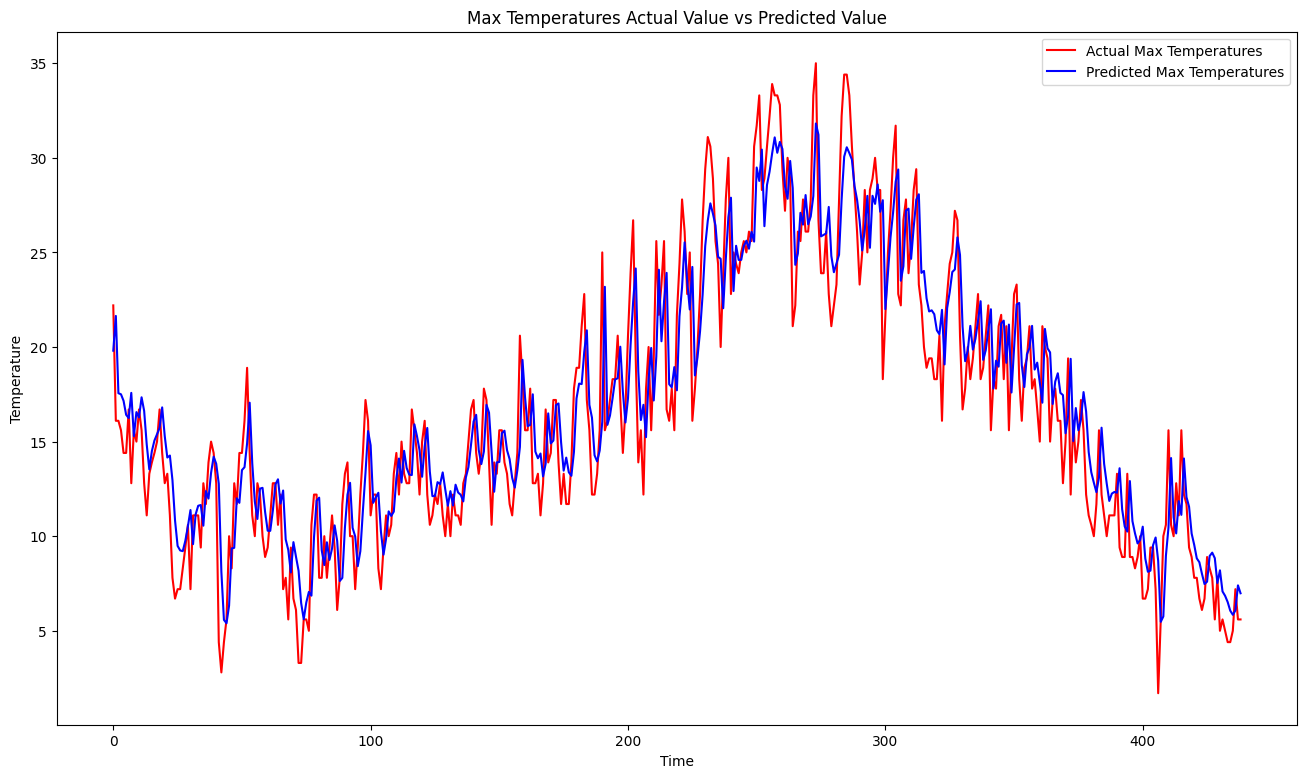

In [31]:
plt.figure(figsize=(16, 9))

plt.title("Max Temperatures Actual Value vs Predicted Value")
plt.plot(test_set, color="red", label="Actual Max Temperatures")
plt.plot(prediction, color="blue", label="Predicted Max Temperatures")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()

plt.show()

## Evaluating the RNN

For Regression, the way to evaluate the model performance is with a metric called RMSE (Root Mean Squared Error). It is calculated as the root of the mean of the squared differences between the predictions and the real values.

In [32]:
rmse = math.sqrt(mean_squared_error(test_set, prediction))

rmse

2.7201521939691617

## Improving the RNN

You can improve the Recurrent Neural Network Model by doing any of the following.

- Getting more training data
- Adding some other indicators/features
- Adding more LSTM layers
- Adding more neurons in the LSTM layers